In [1]:
# Import the required libraries

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
#load breast cancer data and display the features each point represents

breast_cancer_data = load_breast_cancer()
print(breast_cancer_data.data[0])
print(breast_cancer_data.feature_names)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


The first column stands for the mean of distances from center to points on the perimeter

In [3]:
# display the target for each of the data points (1 = malignant, 0 = benign)

print("Target")
print(breast_cancer_data.target)
print("\n")

print("Target Names")
print(breast_cancer_data.target_names)
print("\n")

print(breast_cancer_data.target[0])
print('The first data point is benign')

Target
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0

In [4]:
# split the data into 80% training and 20% test
# set random_state so the same values are grouped anytime the code is run

training_data,validation_data,training_labels,validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=50)

In [5]:
# confirm the split by showing the length of the groups
print("Total number of rows in breast_cancer_data: ", len(breast_cancer_data.data))
print("Number of rows in training_data: ", len(training_data))
print("Number of rows in validation_data: ", len(validation_data))

Total number of rows in breast_cancer_data:  569
Number of rows in training_data:  455
Number of rows in validation_data:  114


In [6]:
# create a classifier object with neighbors=3
classifier = KNeighborsClassifier(n_neighbors=3)

# fit the object with training data and labels
classifier.fit(training_data, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
# check the accuracy by calling score() on the classifer and passing it data from validation set
print(classifier.score(validation_data, validation_labels))

0.9122807017543859


That is pretty good when k=3, the classifier is right 92% of the time

In [8]:
# let us now use different values of k from 1 to 100 and view their score at each k value
    # create a list; accuracy to store the score
    
accuracy = []
for k in range(1, 100):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    accuracy.append(classifier.score(validation_data, validation_labels))

In [9]:
# display the score values
accuracy

[0.9035087719298246,
 0.868421052631579,
 0.9122807017543859,
 0.9035087719298246,
 0.9122807017543859,
 0.9210526315789473,
 0.9385964912280702,
 0.9298245614035088,
 0.9385964912280702,
 0.9298245614035088,
 0.9385964912280702,
 0.9385964912280702,
 0.9473684210526315,
 0.9298245614035088,
 0.9210526315789473,
 0.9210526315789473,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9385964912280702,
 0.9298245614035088,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9473684210526315,
 0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.93859649122

In [10]:
max_value = max(accuracy)
max_index = accuracy.index(max_value)

# print(max_, max_index)
print("The highest accuracy " + str(max_value) + " is when k = " + str(max_index))

The highest accuracy 0.9473684210526315 is when k = 12


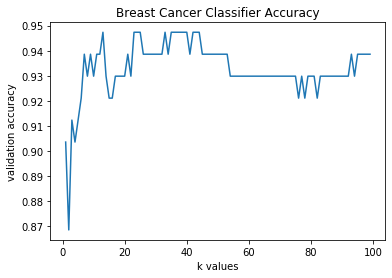

In [11]:
# scrolling through this is hard so we will plot them to find the best k for our classifier
plt.plot(range(1, 100), accuracy)
plt.xlabel("k values")
plt.ylabel("validation accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

#### Take note that k changes when the value in random_state changes